In [1]:
import time
from src.method_selector import MlMethodSelector, ClassicMethodSelector
from src.measurement_provider import MeasurementProvider
from src.serializer import SenMLCBORSerializer, SenMLJSONSerializer
from sys import getsizeof

In [2]:
def compute_sizes(dataset, compressed_data, metrics):
  senML_cbor_size_original = getsizeof(SenMLCBORSerializer.serialize(dataset, '/72/', '1/2', metrics))
  senML_cbor_size_compressed = getsizeof(SenMLCBORSerializer.serialize(compressed_data, '/72/', '1/2', metrics))
  print(senML_cbor_size_original, senML_cbor_size_compressed, senML_cbor_size_original - senML_cbor_size_compressed)

  senML_json_size_original = getsizeof(SenMLJSONSerializer.serialize(dataset, '/72/', '1/2', metrics))
  senML_json_size_compressed = getsizeof(SenMLJSONSerializer.serialize(compressed_data, '/72/', '1/2', metrics))
  print(senML_json_size_original, senML_json_size_compressed, senML_json_size_original - senML_json_size_compressed)

def current_milis():
  return time.time() * 1000

In [3]:
measurement_provider = MeasurementProvider()
# dataset = [measurement_provider.json_to_measurements('airlines.json')]
dataset = measurement_provider.get_random1()

In [4]:
# time()
# time.time() * 1000

In [5]:
ml_method_selector = MlMethodSelector()
# ml_method_selector.use_default_strategy()
ml_method_selector.set_measurements(dataset)
score = ml_method_selector.train()
print(score)

classic_method_selector = ClassicMethodSelector()

1.0


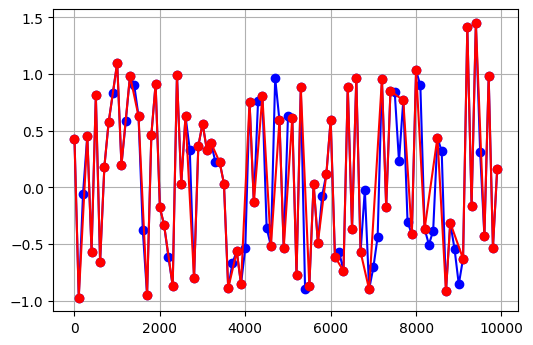

{'original_size': 100, 'compressed_size': 70, 'compression_rate': 0.3, 'method_name': 'CompressPIP_ED_0.7'}
2307 1708 599
5537 3985 1552
time: 74.930908203125
metrics_score: 12.777900345268904


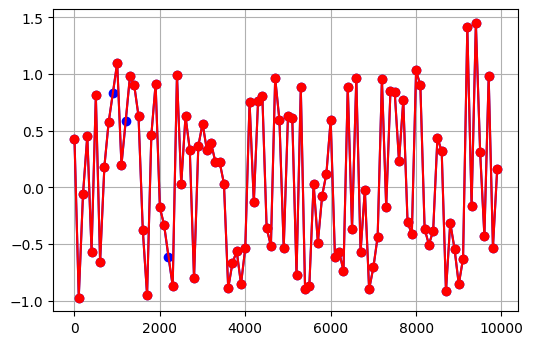

{'original_size': 100, 'compressed_size': 97, 'compression_rate': 0.03, 'method_name': 'CompressSTC_0.1'}
2315 2255 60
5507 5354 153
time: 712.09423828125
metrics_score: 15.603439333378223


In [11]:
dataset = measurement_provider.get_random1()[2]

time_start = current_milis()
compressed_data, stats, metrics = ml_method_selector.compress_with_best(dataset)
time_end = current_milis()
print(stats)
compute_sizes(dataset, compressed_data, metrics)
print(f'time: {time_end - time_start}')
classic_helper = ClassicMethodSelector()
metrics_score = classic_helper.compute_similarity_with_default_strategy(dataset, compressed_data)
print(f'metrics_score: {metrics_score}')

time_start = current_milis()
compressed_data, stats, metrics, metrics_score = classic_method_selector.compress_with_best_default_strategy(dataset)
time_end = current_milis()
print(stats)
compute_sizes(dataset, compressed_data, metrics)
print(f'time: {time_end - time_start}')
print(f'metrics_score: {metrics_score}')